In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data_no_outliers.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19776 entries, 0 to 19775
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Invoice_id            19776 non-null  int64  
 1   Cust_id               19776 non-null  int64  
 2   Txn_date              19776 non-null  object 
 3   Product_Sub_category  19776 non-null  object 
 4   Product_Category      19776 non-null  object 
 5   Qty                   19776 non-null  int64  
 6   Rate                  19776 non-null  int64  
 7   Tax                   19776 non-null  float64
 8   Total_Amt             19776 non-null  float64
 9   Store_type            19776 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.5+ MB


In [5]:
total_sales = df['Total_Amt'].sum()
total_sales

50738362.349999994

In [6]:
#a little bit of data analysis (talked about it last call)
#identifying type of store we have (local or in the midle of "time squre")

unique_customer_number = df['Cust_id'].nunique()
unique_customer_number

5469

In [7]:
customer_freq = df['Cust_id'].value_counts()
customer_freq.describe()

count    5469.000000
mean        3.616018
std         1.769325
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        11.000000
Name: Cust_id, dtype: float64

In [8]:
#how old is this store
df['Txn_date'] = pd.to_datetime(df['Txn_date'])
age = df['Txn_date'].max() - df['Txn_date'].min()
age

Timedelta('1094 days 00:00:00')

In [9]:
#let's build time based DF's
df['Year'] = df['Txn_date'].dt.year
df['Month'] = df['Txn_date'].dt.month
df['Day'] = df['Txn_date'].dt.day
#day of the week and weekends
df['DayOfWeek'] = df['Txn_date'].dt.dayofweek
df['Weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

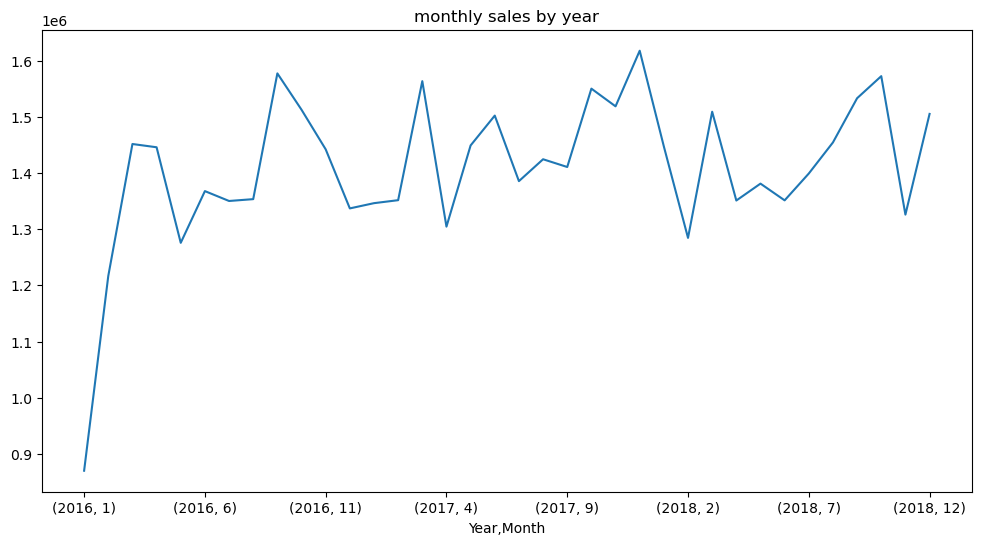

In [10]:
plt.figure(figsize=(12,6))
df.groupby(['Year', 'Month'])['Total_Amt'].sum().plot(kind='line', title='monthly sales by year')

plt.show()


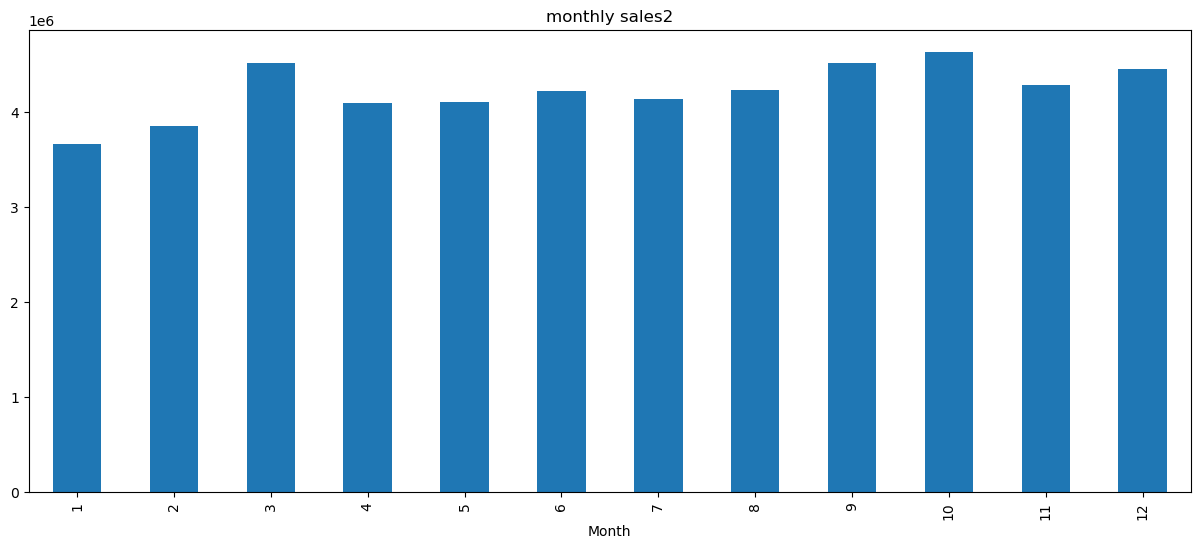

In [28]:
plt.figure(figsize=(15,6))
df.groupby('Month')['Total_Amt'].sum().plot(kind='bar', title='monthly sales2')

plt.show()

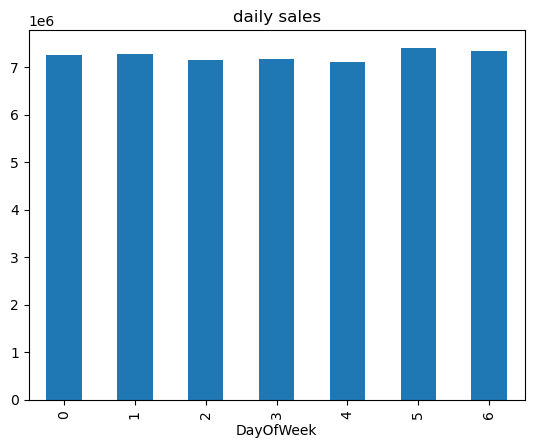

In [12]:
df.groupby('DayOfWeek')['Total_Amt'].sum().plot(kind='bar', title='daily sales')
plt.show()

<Axes: title={'center': 'sales weekends'}, xlabel='Weekend'>

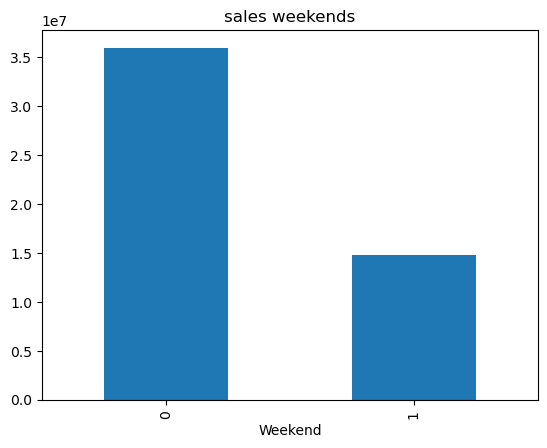

In [13]:
df.groupby('Weekend')['Total_Amt'].sum().plot(kind='bar', title= 'sales weekends')

/Users/pilatuspc12/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:122: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
/Users/pilatuspc12/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:356: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)


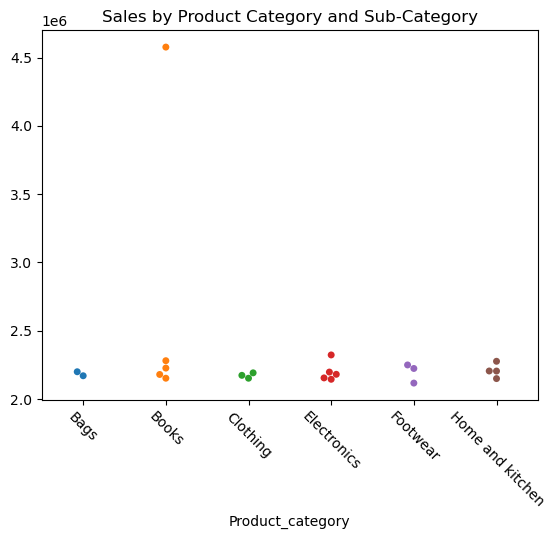

In [23]:
sales = df.groupby(['Product_Sub_category','Product_Category'])['Total_Amt'].sum().unstack()
sns.swarmplot(sales, cmap="coolwarm")
plt.xticks(rotation=-45)
plt.xlabel('Product_category')
plt.title('Sales by Product Category and Sub-Category')
plt.show()

<Figure size 3000x2000 with 0 Axes>

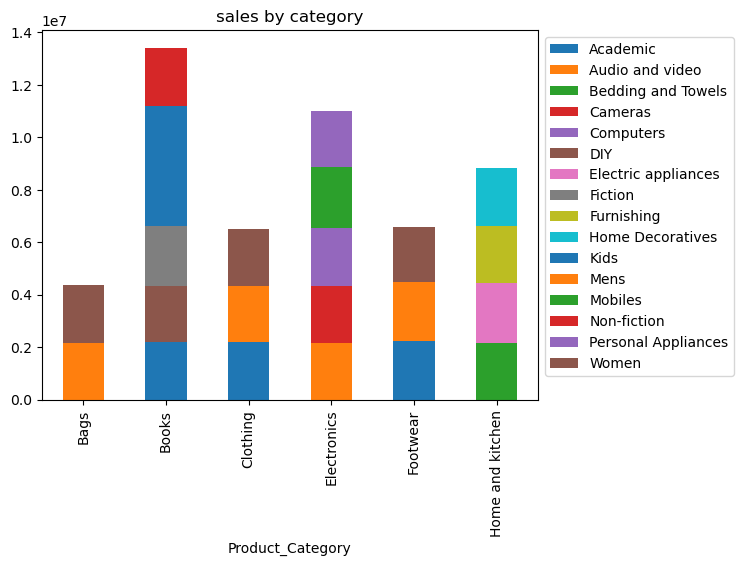

In [90]:
plt.figure(figsize=(30,20))
df.groupby(['Product_Category', 'Product_Sub_category'])['Total_Amt'].sum().unstack().plot(kind='bar', stacked=True, title = "sales by category"
                                                                                          )
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

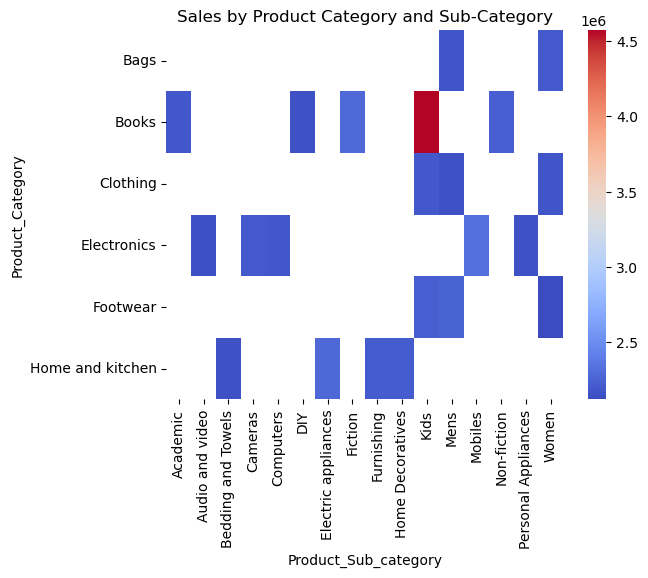

In [91]:
sales = df.groupby(['Product_Category', 'Product_Sub_category'])['Total_Amt'].sum().unstack()
sns.heatmap(sales, cmap="coolwarm")
plt.title('Sales by Product Category and Sub-Category')
plt.show()

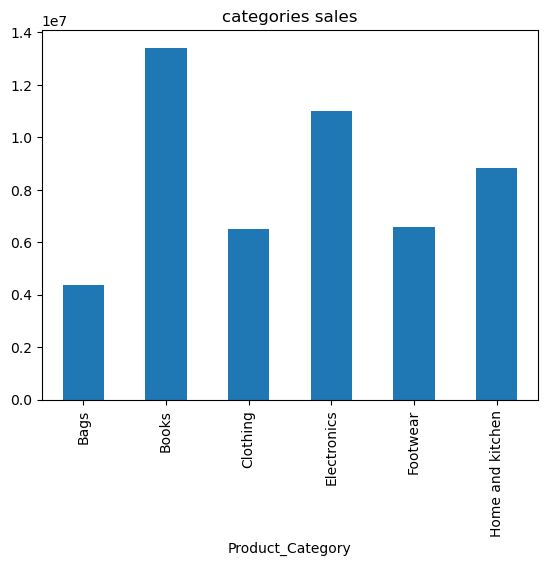

In [77]:
sales_only_categories = df.groupby('Product_Category')['Total_Amt'].sum()
sales_only_categories.plot(kind='bar', title = "categories sales")
plt.show()